In [101]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

In [102]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Preprocessing

In [107]:
df = df.drop(df.columns[0],axis=1)
df = df.drop('flight',axis=1)
df['class'] = df['class'].apply(lambda x: 1 if x =='Business' else 0)

In [108]:
df.stops = pd.factorize(df.stops)[0]

In [109]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination_city')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time',axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time',axis=1)

In [110]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x, y = df.drop('price', axis=1), df.price

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [114]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [115]:
reg.score(x_test,y_test)

0.9852047993395131

In [116]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(x_test)
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9852047993395131
MAE: 1073.2129093481653
MSE: 7606830.99723101
RMSE: 2758.0484037143024


Text(0.5, 1.0, 'Actual vs Predicted flight price')

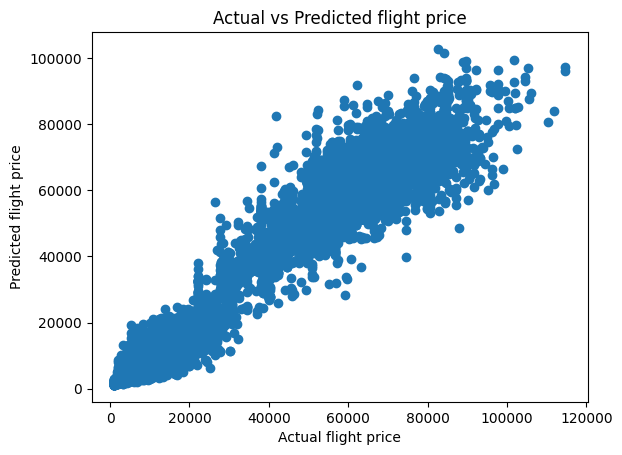

In [117]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual flight price')
plt.ylabel('Predicted flight price')
plt.title('Actual vs Predicted flight price')

In [118]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64